In [25]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [26]:
df = pd.read_excel("new_customer_data.xlsx", index_col=[0])
df.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,profit,Age,gender,job_industry_category,job_title,owns_car,past_3_years_bike_related_purchases,wealth_segment,postcode,state
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,17.87,68,Male,Financial Services,Software Engineer I,Yes,19,Mass Customer,3064,VIC
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,1702.55,44,Female,Health,Clinical Specialist,Yes,89,Mass Customer,2196,NSW
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,...,1544.61,45,Male,Retail,Desktop Support Technician,No,9,Affluent Customer,2835,NSW
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,...,817.36,61,Male,Financial Services,Staff Scientist,No,83,Mass Customer,2096,NSW
5,6,25,2339,2017-03-08,1,Approved,Giant Bicycles,Road,medium,medium,...,709.34,64,Male,Property,Web Designer II,Yes,3,Affluent Customer,2153,NSW
6,7,22,1542,2017-04-21,1,Approved,WeareA2B,Standard,medium,medium,...,15.08,44,Male,Health,Food Chemist,Yes,56,Mass Customer,2155,NSW
7,8,15,2459,2017-07-15,0,Approved,WeareA2B,Standard,medium,medium,...,1279.40,37,Female,Manufacturing,Quality Engineer,No,67,High Net Worth,4034,QLD
8,9,67,1305,2017-08-10,0,Approved,Solex,Standard,medium,large,...,690.49,53,Male,Financial Services,Executive Secretary,Yes,97,High Net Worth,4124,QLD
9,10,12,3262,2017-08-30,1,Approved,WeareA2B,Standard,medium,medium,...,1069.55,63,Male,Entertainment,Product Engineer,No,65,Mass Customer,4221,QLD
11,12,61,2783,2017-01-05,1,Approved,OHM Cycles,Standard,low,medium,...,14.23,44,Male,Retail,Sales Representative,Yes,14,Affluent Customer,2171,NSW


In [27]:
df=pd.DataFrame(df)

In [28]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'profit', 'Age', 'gender', 'job_industry_category', 'job_title',
       'owns_car', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'postcode', 'state'],
      dtype='object')

In [29]:
demo_df=df.drop(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'profit', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'postcode', 'state', 'job_title'], axis=1)

In [30]:
demo_df.head()

,Age,gender,job_industry_category,owns_car
0,68,Male,Financial Services,Yes
1,44,Female,Health,Yes
2,45,Male,Retail,No
3,61,Male,Financial Services,No
5,64,Male,Property,Yes


## Clustering using K-prototypes 

As this customer demographic information is a mix of numerical and categorical variables, I use K-prototypes. 

The K-Prototype clustering algorithm in kmodes module needs categorical variables or columns position in the data. This task aims to save those in a given variables catColumnsPos. It will be added for the next task in cluster analysis. The categorical column position is in the first four columns in the data.

In [31]:
# Get the position of categorical columns
catColumnsPos = [demo_df.columns.get_loc(col) for col in list(demo_df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(demo_df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['gender', 'job_industry_category', 'owns_car']
Categorical columns position  : [1, 2, 3]


In [32]:
# Convert dataframe to matrix
demo_dfMatrix = demo_df.to_numpy()
demo_dfMatrix

array([[68, 'Male', 'Financial Services', 'Yes'],
       [44, 'Female', 'Health', 'Yes'],
       [45, 'Male', 'Retail', 'No'],
       ...,
       [48, 'Female', 'Financial Services', 'No'],
       [49, 'Female', 'Telecommunications', 'No'],
       [26, 'Male', 'Health', 'Yes']], dtype=object)

In [33]:
from kmodes.kprototypes import KPrototypes

### Elbow method to optimal cluster number

In [34]:
cost = []
for i in range (1, 11):
    try:
        kprototypes = KPrototypes(n_jobs = -1, init='Huang', random_state=0, n_clusters=i)
        kprototypes.fit_predict(demo_dfMatrix, categorical=catColumnsPos)
        cost.append(kprototypes.cost_)
        print('Cluster initiation: {}'.format(i))
    except:
        break
        

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10


Text(0, 0.5, 'Number of Cluster k')

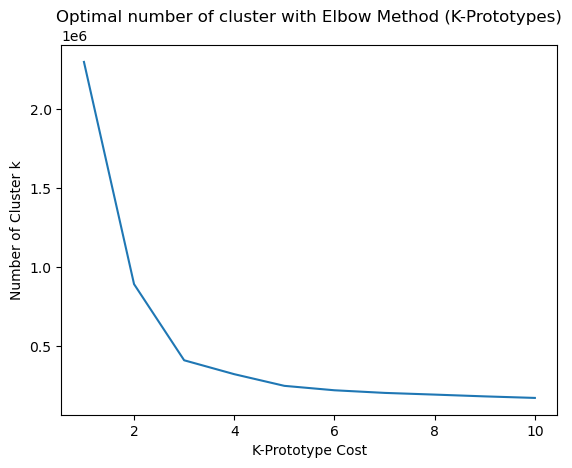

In [44]:
plt.plot(range(1,11), cost)
plt.title('Optimal number of cluster with Elbow Method (K-Prototypes)')
plt.xlabel('K-Prototype Cost')
plt.ylabel('Number of Cluster k')

As we can see from Elbow plot, the number of cluster in this case is k=3

In [45]:
kprototypes = KPrototypes(n_jobs=-1, n_clusters=3, init='Huang', random_state=0)
label = kprototypes.fit_predict(demo_dfMatrix, categorical=catColumnsPos)

In [37]:
# Cluster centorid
kprototypes.cluster_centroids_


array([['61.18463239358762', 'Female', 'Manufacturing', 'Yes'],
       ['45.857410243321425', 'Female', 'Manufacturing', 'Yes'],
       ['29.963052402801257', 'Male', 'Financial Services', 'No']],
      dtype='<U32')

In [38]:
# Check the iteration of the clusters created
kprototypes.n_iter_


6

In [39]:
# Check the cost of the clusters created
kprototypes.cost_

409458.3860755435

In [40]:
demo_df['cluster_label'] = kprototypes.labels_
demo_df

,Age,gender,job_industry_category,owns_car,cluster_label
0,68,Male,Financial Services,Yes,0
1,44,Female,Health,Yes,1
2,45,Male,Retail,No,1
3,61,Male,Financial Services,No,0
5,64,Male,Property,Yes,0
...,...,...,...,...,...
19439,45,Female,Manufacturing,Yes,1
19440,28,Male,Manufacturing,Yes,2
19441,48,Female,Financial Services,No,1
19442,49,Female,Telecommunications,No,1


### Analysis

<Axes: title={'center': 'Count of customers in cluster'}, xlabel='Cluster', ylabel='Customer'>

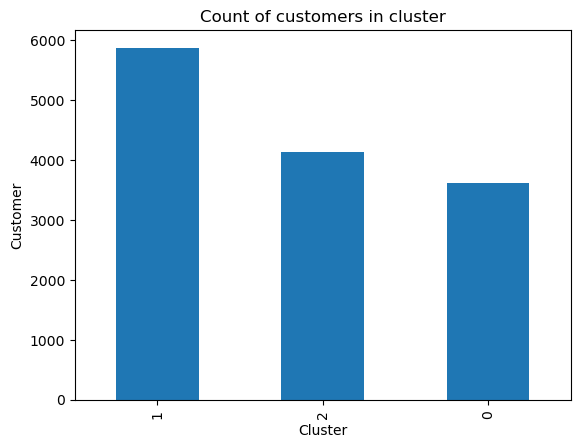

In [72]:
demo_df['cluster_label'].value_counts().plot(kind='bar', title='Count of customers in cluster', xlabel='Cluster', ylabel='Customer')

In [66]:
fig = px.scatter(demo_df, x='Age', color='cluster_label')
fig.show()

At this point we can see that cluster 1 and 2 are the main customer cluster. 
- Cluster 1: who are from 38 to 53 years old.
- Cluster 2: who are from 21 to 37 years old. 
- Cluster 0: who are from 54 to 91 years old, but most of them concentrate on 54 to 69.

In [58]:
demo_df.groupby('cluster_label')['Age'].mean()

cluster_label
0    61.184632
1    45.857410
2    29.963052
Name: Age, dtype: float64

- Cluster 1: who are from 38 to 53 years old, mean age is 45.
- Cluster 2: who are from 21 to 37 years old, mean age is 30. 
- Cluster 0: who are from 54 to 91 years old. Due to some outliers, not consider mean age in Cluster 0.

In [68]:
pd.crosstab(demo_df['cluster_label'], demo_df['gender'])

gender,Female,Male,U
cluster_label,,,
0,1817,1793,8
1,3099,2778,0
2,2046,2095,0


In [69]:
pd.crosstab(demo_df['cluster_label'], demo_df['gender'], normalize='index')

gender,Female,Male,U
cluster_label,,,
0,0.502211,0.495578,0.002211
1,0.527310,0.472690,0.000000
2,0.494084,0.505916,0.000000


- Cluster 1: who are from 38 to 53 years old, average age is 45. Half of them (52.7%) are Female. 
- Cluster 2: who are from 21 to 37 years old, average age is 30. Approximately 50% of them are Male. 
- Cluster 0: the similar percentage across genders. 

- Hence, there is no significant different between gender in each cluster.

In [ ]:
#save demo_df as csv in case for further analysis by visualization
#demo_df.to_csv('customer_clustering.csv')